# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.).

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
`
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'.
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'.
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

In [2]:
import pandas as pd
import requests

sinasc = pd.read_csv('SINASC_RO_2019.csv') #Local
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [3]:
# Verificando as colunas e os tipos de dados
sinasc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
# Estatísticas descritivas básicas das colunas numéricas
sinasc.describe()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
count,27028.0,2.691300e+04,27028.000000,27028.000000,27028.000000,26711.000000,24121.000000,25455.000000,24930.000000,27028.000000,...,27028.000000,27028.0,27028.000000,27028.000000,27028.000000,2.702800e+04,27027.000000,27027.000000,27027.000000,27027.000000
mean,1.0,3.267629e+06,111037.796211,1.011396,26.093718,2.545318,795604.031591,1.053899,0.266506,110029.055720,...,0.999778,1.0,4.328437,0.648772,4.974952,7.367650e+05,-10.377988,-62.754987,179.111999,14702.799767
std,0.0,1.122677e+06,18102.751466,0.161679,6.387094,1.671248,283884.959287,1.170874,0.613909,36.036466,...,0.014898,0.0,2.930690,0.477363,2.067085,7.430325e+05,1.372942,1.269490,123.138365,13706.177751
min,1.0,1.531800e+04,110001.000000,1.000000,11.000000,1.000000,10205.000000,0.000000,0.000000,110000.000000,...,0.000000,1.0,1.000000,0.000000,1.000000,1.000000e+00,-13.499760,-65.329150,85.000000,459.978000
25%,1.0,2.496534e+06,110011.000000,1.000000,21.000000,1.000000,521125.000000,0.000000,0.000000,110012.000000,...,1.000000,1.0,2.000000,0.000000,4.000000,6.802750e+03,-11.433870,-63.831450,87.000000,3792.998000
50%,1.0,2.798484e+06,110020.000000,1.000000,26.000000,2.000000,999992.000000,1.000000,0.000000,110020.000000,...,1.000000,1.0,4.000000,1.000000,5.000000,1.364550e+04,-10.435950,-63.033270,153.000000,6896.648000
75%,1.0,3.970442e+06,110020.000000,1.000000,31.000000,5.000000,999992.000000,2.000000,0.000000,110028.000000,...,1.000000,1.0,5.000000,1.000000,5.000000,1.486846e+06,-8.768890,-61.945090,191.000000,34096.394000
max,1.0,9.659366e+06,520870.000000,4.000000,53.000000,9.000000,999994.000000,30.000000,28.000000,110180.000000,...,1.000000,1.0,11.000000,1.000000,9.000000,2.780269e+06,-8.768890,-60.138580,595.000000,34096.394000


<Axes: >

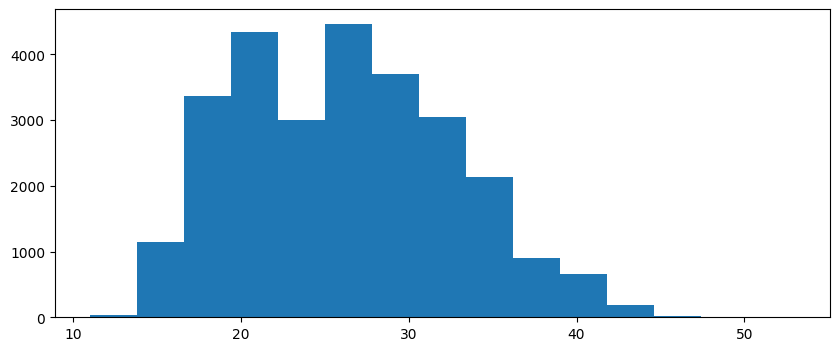

In [5]:
# Distribuição das idades das mães
sinasc['IDADEMAE'].hist(bins=15, figsize=(10, 4), grid=False)


In [6]:
# Valores únicos de escolaridade das mães
sinasc['ESCMAE'].value_counts()


,count
ESCMAE,
8 a 11 anos,15633
12 anos ou mais,5767
4 a 7 anos,4760
1 a 3 anos,516
Nenhuma,40


In [7]:
# Substituir valores faltantes da variável quantitativa QTDFILVIVO por 0
sinasc['QTDFILVIVO'] = sinasc['QTDFILVIVO'].fillna(0)

# Outras variáveis categóricas — preenchemos com 'não informado' ou -1 (caso numérico)
colunas_cat = ['ESCMAE', 'ESTCIVMAE', 'CODOCUPMAE']
for col in colunas_cat:
    if sinasc[col].dtype == 'O':  # se for string
        sinasc[col] = sinasc[col].fillna('não informado')
    else:
        sinasc[col] = sinasc[col].fillna(-1)


In [8]:
def classificar_apgar(valor):
    if pd.isnull(valor):
        return 'não informado'
    elif valor >= 8:
        return 'normal'
    elif valor >= 6:
        return 'asfixia leve'
    elif valor >= 4:
        return 'asfixia moderada'
    else:
        return 'asfixia severa'

sinasc['APGAR1_CATEGORIA'] = sinasc['APGAR1'].apply(classificar_apgar)

# Frequência das categorias
print(sinasc['APGAR1_CATEGORIA'].value_counts())


APGAR1_CATEGORIA
normal              23802
asfixia leve         2523
asfixia moderada      376
asfixia severa        231
não informado          96
Name: count, dtype: int64


In [9]:
sinasc.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
